In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [26]:
# Load the Social_Network_Ads dataset
social_data = pd.read_csv('Social_Network_Ads_for_prac5.csv')

In [27]:
# Check for NaN values
print(social_data.head(25))

     User ID  Gender  Age  EstimatedSalary  Purchased
0   15624510    Male   19            19000          0
1   15810944    Male   35            20000          0
2   15668575  Female   26            43000          0
3   15603246  Female   27            57000          0
4   15804002    Male   19            76000          0
5   15728773    Male   27            58000          0
6   15598044  Female   27            84000          0
7   15694829  Female   32           150000          1
8   15600575    Male   25            33000          0
9   15727311  Female   35            65000          0
10  15570769  Female   26            80000          0
11  15606274  Female   26            52000          0
12  15746139    Male   20            86000          0
13  15704987    Male   32            18000          0
14  15628972    Male   18            82000          0
15  15697686    Male   29            80000          0
16  15733883    Male   47            25000          1
17  15617482    Male   45   

In [28]:
# Separate features (X) and target variable (y)
X = social_data[['Age', 'EstimatedSalary']]
y = social_data['Purchased']

In [29]:
# Handle NaN values by imputing the mean
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

In [30]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [32]:
# Create a Logistic Regression model
model = LogisticRegression(random_state=42)

In [33]:
# Train the model
model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [34]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [35]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)

Accuracy: 0.8625
Confusion Matrix:
[[50  2]
 [ 9 19]]


In [36]:
# Compute Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

In [37]:
# Extract values from the confusion matrix
TN, FP, FN, TP = conf_matrix.ravel()

In [38]:
# Compute Performance Metrics
accuracy = accuracy_score(y_test, y_pred)
error_rate = 1 - accuracy
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [39]:
# Print the results
print("Confusion Matrix:")
print(conf_matrix)
print("\nTrue Positive (TP):", TP)
print("False Positive (FP):", FP)
print("True Negative (TN):", TN)
print("False Negative (FN):", FN)
print("\nAccuracy:", accuracy)
print("Error Rate:", error_rate)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Confusion Matrix:
[[50  2]
 [ 9 19]]

True Positive (TP): 19
False Positive (FP): 2
True Negative (TN): 50
False Negative (FN): 9

Accuracy: 0.8625
Error Rate: 0.13749999999999996
Precision: 0.9047619047619048
Recall: 0.6785714285714286
F1 Score: 0.7755102040816326


Text(0, 0.5, 'Estimated Salary')

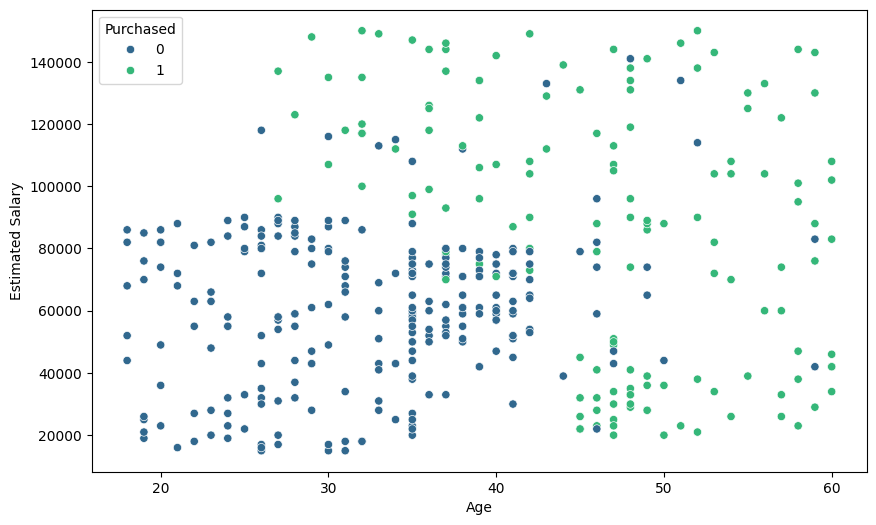

In [40]:
# Plot the decision boundary
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='EstimatedSalary', hue='Purchased', data=social_data, palette='viridis')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')

In [41]:
# Plotting decision boundary
h = 0.5
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

In [42]:
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

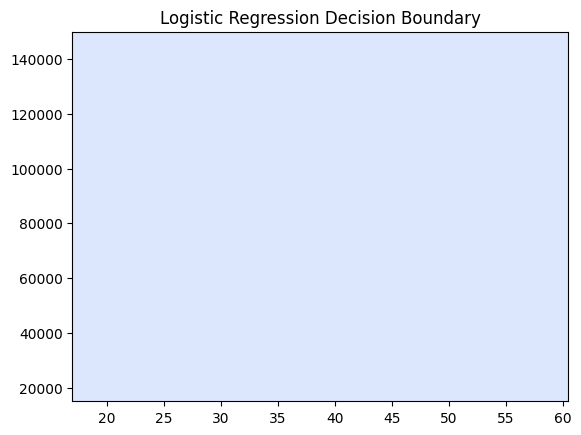

In [43]:
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.3)
plt.title('Logistic Regression Decision Boundary')
plt.show()